# **Read DATA**

*****************************
Please make sure you use the same gpu shown below : 
*****************************

In [ ]:
!nvidia-smi

Wed Dec  2 13:29:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

*********************
Please upload your kaggle json : you can find it in your profile 
*********************

In [ ]:
from google.colab import files
!pip install -q kaggle
files.upload() #kaggle.json file downloaded from api
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ttahara/pytorch-pfn-extras
!unzip pytorch-pfn-extras.zip -d  pytorch-pfn-extras


  0% 0.00/129k [00:00<?, ?B/s]
100% 129k/129k [00:00<00:00, 47.3MB/s]
Archive:  pytorch-pfn-extras.zip
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/PKG-INFO  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/README.md  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/PKG-INFO  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/SOURCES.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/dependency_links.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/requires.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/top_level.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras/__init__.py  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras/_version.py  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras/

In [ ]:
%%bash
pip install /content/pytorch-pfn-extras/pytorch-pfn-extras-0.3.1

Processing ./pytorch-pfn-extras/pytorch-pfn-extras-0.3.1
  Created wheel for pytorch-pfn-extras: filename=pytorch_pfn_extras-0.3.1-cp36-none-any.whl size=99756 sha256=d7c6302489000c4b274e5482ad9ceeb28c60861e3238f54d82284475b603cf0b
  Stored in directory: /root/.cache/pip/wheels/ad/71/c5/c3160f7184b3a8562729fde266c86eea7594161ddec85ad01a
Successfully built pytorch-pfn-extras


In [ ]:
import os
import cv2
import sys
import time
import math

import random
import librosa
import warnings
#import torchaudio
#import torchvision
import numpy as np
import pandas as pd
import typing as tp
import IPython.display as ipd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.nn.modules.utils import _pair
from torch.nn import Conv2d, Module, Linear, BatchNorm2d, ReLU


pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Zindi/Competitions/GIZ"

In [ ]:
def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results
    
    Arguments:
        seed {int} -- Number of the seed
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False #False

In [ ]:
SEED_VAL = 1213
seed_everything(SEED_VAL)

In [ ]:
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/Train.csv" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/SampleSubmission.csv" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/audio_files.zip" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/AdditionalUtterances.zip" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/nlp_keywords_29Oct2020.zip" .

In [ ]:
!unzip AdditionalUtterances.zip 
!unzip audio_files.zip
!unzip nlp_keywords_29Oct2020.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: latest_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_34df793d29d44266adf25664e8c6dc03.wav  
  inflating: latest_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_45c35e9401a0409899981a0b96f1753a.wav  
  inflating: latest_keywords/ppaapaali/79aac18aacc74cc092d00778f7f323da_e932f971e74b4fd99c69a88b98464010.wav  
  inflating: latest_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7.wav  
  inflating: latest_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_78896821953949ab8c97f5a796aeb6d8.wav  
  inflating: latest_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_cda86edbc31044b995d13453f3d302f6.wav  
  inflating: latest_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_6f0a37308160411da68c2ab09cd303f6.wav  
  inflating: latest_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_65fb16ebbb724378b23d281d8673d0d2.wav  
  inflating: latest_keywords/ebikongoliro/0

In [ ]:
!rm AdditionalUtterances.zip
!rm audio_files.zip
!rm nlp_keywords_29Oct2020.zip

In [ ]:
train = pd.read_csv("Train.csv")

In [ ]:
def create_new_train():  
  import glob
  dirs = glob.glob('latest_keywords/*')
  new_atterances = pd.DataFrame()
  labels = []
  fn = []
  for dir in dirs:
    wav_paths = glob.glob(dir+'/*')
    fn.extend(wav_paths)
    labels.extend(len(wav_paths) * [dir.split('/')[-1]])
  new_atterances['fn'] = fn
  new_atterances['label'] = labels
  new_atterances = new_atterances.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train = pd.read_csv('Train.csv')
  train = pd.concat([train,new_atterances])
  train = train.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train.to_csv('new_train.csv',index=False)
  print(train.head())
create_new_train()
def create_new_train_1():  
  import glob
  dirs = glob.glob('nlp_keywords/*')
  new_atterances = pd.DataFrame()
  labels = []
  fn = []
  for dir in dirs:
    wav_paths = glob.glob(dir+'/*')
    fn.extend(wav_paths)
    labels.extend(len(wav_paths) * [dir.split('/')[-1]])
  new_atterances['fn'] = fn
  new_atterances['label'] = labels
  new_atterances = new_atterances.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train = pd.read_csv('new_train.csv')
  train = pd.concat([train,new_atterances])
  train = train.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train.to_csv('final_train.csv',index=False)
  print(train.head())

create_new_train_1()

                                                  fn      label
0  latest_keywords/ebisooli/771b5044334242fb9caff...   ebisooli
1                            audio_files/6QRKXIC.wav   ebikajjo
2                            audio_files/K4V0N40.wav   ebisooli
3                            audio_files/V9CM2BC.wav  obusaanyi
4  latest_keywords/ekisaanyi/744b1a437234489fae95...  ekisaanyi
                                                  fn     label
0                            audio_files/T76GMLD.wav    bulimi
1                            audio_files/H536AW2.wav       npk
2  nlp_keywords/muwogo/d027264654b94950aeb204f64d...    muwogo
3  latest_keywords/kikajjo/2497942026ef4d7e97d47f...   kikajjo
4  nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e...  ennimiro


In [ ]:
train = pd.read_csv("final_train.csv")

In [ ]:
train.shape

(4709, 2)

In [ ]:
sub = pd.read_csv("SampleSubmission.csv")

# **Parameters :**

In [ ]:
CLASSES = sub.columns[1:]
NUM_CLASSES = len(CLASSES)
NUM_WORKERS = 4

In [ ]:
CLASSES_CODE = {i:index for index,i in enumerate(CLASSES) }
INV_CLASSES_CODE = {v: k for k, v in CLASSES_CODE.items()}


In [ ]:
melspectrogram_parameters = {
        "sampling_rate": 16000,
        "duration" : 3.5,
        "n_mels": 32,
        "fmin": 20,## changed from 50  
        "fmax": 8000,
        "hop_length" : 100,  # to make width= 128
        "n_fft" : 512
    }

In [ ]:
!mkdir training_output

*********************************
**PS** : replace the output_dir with the location of your directory called resnest269 in your drive
*********************************



In [ ]:
settings_str = """
globals:

  seed: 1213
  device: cuda
  num_epochs: 15
  output_dir: /content/drive/MyDrive/Zindi/Competitions/GIZ/resnest269/
  use_fold: 0
  target_sr: 41000

dataset:
  name: SpectrogramDataset
  params:
    img_size: 64

    
split:
  name: StratifiedKFold
  params:
    n_splits: 10
    random_state: 42
    shuffle: True

loader:
  train:
    batch_size: 8
    shuffle: True
    num_workers: 2
    pin_memory: True
    drop_last: True
  val:
    batch_size: 32
    shuffle: False
    num_workers: 2
    pin_memory: True
    drop_last: False
  test:
    batch_size: 32
    shuffle: False
    num_workers: 2
    pin_memory: True
    drop_last: False

model:
  name: resnest269
  params:
    pretrained: True
    n_classes: 193

loss:
  name: CrossEntropyLoss
  params: {}

optimizer:
  name: Adam
  params:
    lr: 0.00008

scheduler:
  name: CosineAnnealingLR
  params:
    T_max: 5
"""

In [ ]:
import yaml
settings = yaml.safe_load(settings_str)

# **Save Melsepcs to Disque**

In [ ]:
def show_audio(ad):
    sig,sr = ad
    ipd.display(ipd.Audio(data=sig, rate=sr))

In [ ]:
def melspectogram_dB(file_path, cst=5, top_db=80.):
  row_sound, sr = librosa.load(file_path,sr=melspectrogram_parameters["sampling_rate"])
  sound = np.zeros((cst*sr,))

  if row_sound.shape[0] < cst*sr:
    sound[:row_sound.shape[0]] = row_sound[:]
  else:
    sound[:] = row_sound[:cst*sr]

  spec = librosa.feature.melspectrogram(sound, 
                                    sr=melspectrogram_parameters["sampling_rate"],
                                    n_mels=melspectrogram_parameters["n_mels"],
                                    hop_length=melspectrogram_parameters["hop_length"],
                                    n_fft=melspectrogram_parameters["n_fft"],
                                    fmin=melspectrogram_parameters["fmin"],
                                    fmax=melspectrogram_parameters["fmax"])
  spec_db = librosa.power_to_db(spec)
  spec_db = spec_db.astype(np.float32)

  return spec_db
  
  
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_img = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  
  return spec_img.astype(np.uint8)



def save_spec_image(spec_img, fname):
  cv2.imwrite(fname, spec_img)

In [ ]:
# Add file names
from tqdm import tqdm
def add_file_name(train=train,submission=sub) : 
  train['spec_name'] = 'Imgs/Train/'+train['fn'].apply(lambda x : x.split('/')[-1].split('.')[0])+'.png'

  submission['spec_name'] = 'Imgs/Test/'+submission['fn'].apply(lambda x : x.split('/')[-1].split('.')[0])+'.png'
  return train , submission

In [ ]:
train , submission = add_file_name(train=train,submission=sub)

In [ ]:
#Placeholder for the training and test spectogram's images
#It is going to store the spec, we will shortly generate.
os.makedirs('Imgs/Train/', exist_ok=True)
os.makedirs('Imgs/Test/', exist_ok=True)

In [ ]:
train.loc[1,'spec_name']

'Imgs/Train/H536AW2.png'

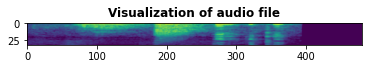

In [ ]:
spec = melspectogram_dB(train.loc[1,'fn'], 3)

plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)

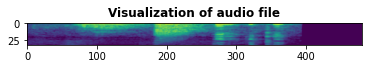

In [ ]:
spec = melspectogram_dB(train.loc[1,'fn'], 3)

plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)
img = spec_to_image(spec)


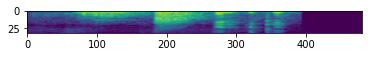

In [ ]:
plt.imshow(img)

In [ ]:
#Training specs
for row in tqdm(train.values):
  sound_path = row[0] #this corresponds to 'file_name'
  spec_name = row[2] #this corresponds to 'spec_name'

  spec = melspectogram_dB(sound_path, 3)
  spec = spec_to_image(spec)
  save_spec_image(spec, spec_name)

100%|██████████| 4709/4709 [19:14<00:00,  4.08it/s]


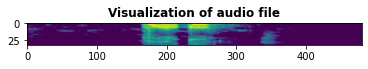

In [ ]:
plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)

In [ ]:
#Training specs
for row in tqdm(submission.values):
  sound_path = row[0] #this corresponds to 'file_name'
  spec_name = row[-1] #this corresponds to 'spec_name'

  spec = melspectogram_dB(sound_path, 3)
  spec = spec_to_image(spec)
  save_spec_image(spec, spec_name)

100%|██████████| 1017/1017 [03:19<00:00,  5.09it/s]


# **DataSet Building :**

In [ ]:
import albumentations
from albumentations.core.transforms_interface import DualTransform, BasicTransform


In [ ]:
class AudioTransform(BasicTransform):
    """Transform for Audio task"""

    @property
    def targets(self):
        return {"data": self.apply}
    
    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params


In [ ]:
class MelSpectrogram(AudioTransform):
    """Shifting time axis"""
    def __init__(self, parameters, always_apply=False, p=0.5):
        super(MelSpectrogram, self).__init__(always_apply, p)

        self.parameters = parameters
    
    def apply(self, data, **params):
        sound, sr = data

        melspec = librosa.feature.melspectrogram(sound, sr=sr, **self.parameters)
        melspec = librosa.power_to_db(melspec)
        melspec = melspec.astype(np.float32)

        return melspec, sr

In [ ]:
audio_augmentation_train = albumentations.Compose([
     MelSpectrogram(parameters=melspectrogram_parameters,always_apply=True),
])
audio_augmentation_valid = albumentations.Compose([
     MelSpectrogram(parameters=melspectrogram_parameters,always_apply=True),
])

In [ ]:
import matplotlib.pyplot as plt
import imageio
import cv2

class SpectrogramDataset(data.Dataset):
    def __init__(
        self,
        file_list: tp.List[tp.List[str]], img_size=224,
        waveform_transforms=None, spectrogram_transforms=None, melspectrogram_parameters={},
        train_bool = True
    ):
        self.file_list = file_list  # list of list: [file_path, Class_code]
        self.img_size = img_size
        self.waveform_transforms = waveform_transforms
        self.spectrogram_transforms = spectrogram_transforms
        self.melspectrogram_parameters = melspectrogram_parameters
        self.train_bool = train_bool

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx: int):
        #wav_path, word_code = self.file_list[idx]
        if self.train_bool:
          melspec_path, word_code = self.file_list[idx]
        else: 
          melspec_path = self.file_list[idx]

        image = cv2.imread(melspec_path,cv2.IMREAD_GRAYSCALE)                    
        height, width = image.shape

        image = cv2.resize(image, (int(width * self.img_size / height), self.img_size))


        labels = 0

        if self.train_bool:
          labels = CLASSES_CODE[word_code[0]]
          return image, labels
        else:
          return image

In [ ]:
def get_loaders_for_training(
    args_dataset: tp.Dict, args_loader: tp.Dict,
    train_file_list: tp.List[str], val_file_list: tp.List[str]
):

    # # make dataset
    train_dataset = SpectrogramDataset(train_file_list,spectrogram_transforms=audio_augmentation_train, **args_dataset)
    val_dataset = SpectrogramDataset(val_file_list,spectrogram_transforms=audio_augmentation_valid, **args_dataset)
    # # make dataloader
    train_loader = data.DataLoader(train_dataset, **args_loader["train"])
    val_loader = data.DataLoader(val_dataset, **args_loader["val"])
    
    return train_loader, val_loader

# **Modeling :**

In [ ]:
def get_model(args: tp.Dict):
  
    # get list of models
    torch.hub.list('zhanghang1989/ResNeSt', force_reload=True)
    # load pretrained models, using ResNeSt-50 as an example
    model = torch.hub.load('zhanghang1989/ResNeSt', args["name"], pretrained = args["params"]["pretrained"])
    
    weight_new = model.conv1[0].weight
    conv2_new =  Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) 
    
    model.conv1[0] = conv2_new
    model.conv1[0].weight = torch.nn.Parameter(model.conv1[0].weight.sum(dim=1, keepdim=True))
       

    del model.fc
   
    # # use the same head as the baseline notebook.
    
    model.fc = nn.Sequential(
        nn.Linear(2048, args["params"]["n_classes"]))
    
    
    return model

In [ ]:
def train_loop(
    manager, args, model, device,
    train_loader, optimizer, scheduler, loss_func
):
    """Run minibatch training loop"""
    while not manager.stop_trigger:
        model.train()
        progress_bar = tqdm_notebook(train_loader)
        for batch_idx, (data, target) in enumerate(progress_bar):
            with manager.run_iteration():
               
                data = data.type(torch.FloatTensor)

                data, target = data.to(device, dtype=torch.float), target.to(device,dtype=torch.long)
                
                optimizer.zero_grad()

                output = model(data.unsqueeze(dim=1))
                loss = loss_func(output, target)
                progress_bar.set_description(f'train/loss: {loss.item():.6f}')
                ppe.reporting.report({'train/loss': loss.item()})
                loss.backward()
                optimizer.step()
            if scheduler : 
              scheduler.step()

def eval_for_batch(
    args, model, device,
    data, target, loss_func, eval_func_dict={}
):
    """
    Run evaliation for valid
    
    This function is applied to each batch of val loader.
    """
    model.eval()
    data = data.type(torch.FloatTensor)
    data, target = data.to(device, dtype=torch.float), target.to(device,dtype=torch.long)
    output = model(data.unsqueeze(dim=1))
    # Final result will be average of averages of the same size
    val_loss = loss_func(output, target).item()
    ppe.reporting.report({'val/loss': val_loss})
    
    for eval_name, eval_func in eval_func_dict.items():
        eval_value = eval_func(output, target).item()
        ppe.reporting.report({"val/{}".format(eval_name): eval_value})

In [ ]:
def set_extensions(
    manager, args, model, device, test_loader, optimizer,
    loss_func,fold, eval_func_dict={},
    
):
    """set extensions for PPE"""
    use_fold = fold     
    my_extensions = [
        # # observe, report
        ppe_extensions.observe_lr(optimizer=optimizer),
        # ppe_extensions.ParameterStatistics(model, prefix='model'),
        # ppe_extensions.VariableStatisticsPlot(model),
        ppe_extensions.LogReport(),
        ppe_extensions.PlotReport(['train/loss', 'val/loss'], 'epoch', filename='loss.png'),
        ppe_extensions.PlotReport(['lr',], 'epoch', filename='lr.png'),
        ppe_extensions.PrintReport([
            'epoch', 'iteration', 'lr', 'train/loss', 'val/loss', "elapsed_time"]),
#         ppe_extensions.ProgressBar(update_interval=100),

        # # evaluation
        (
            ppe_extensions.Evaluator(
                test_loader, model,
                eval_func=lambda data, target:
                    eval_for_batch(args, model, device, data, target, loss_func, eval_func_dict),
                progress_bar=True),
            (1, "epoch"),
        ),
        # # save model snapshot.
        (
            ppe_extensions.snapshot(
                target=model, filename=f"best_fold_{use_fold}.pth"),
            ppe.training.triggers.MinValueTrigger(key="val/loss", trigger=(1, 'epoch'))
        ),
        
        
    ]
           
    # # set extensions to manager
    for ext in my_extensions:
        if isinstance(ext, tuple):
            manager.extend(ext[0], trigger=ext[1])
        else:
            manager.extend(ext)
        
    return manager

# **Get WAVs**

In [ ]:
train.head()

,fn,label,spec_name
0,audio_files/T76GMLD.wav,bulimi,Imgs/Train/T76GMLD.png
1,audio_files/H536AW2.wav,npk,Imgs/Train/H536AW2.png
2,nlp_keywords/muwogo/d027264654b94950aeb204f64d...,muwogo,Imgs/Train/d027264654b94950aeb204f64d05d8d7_c5...
3,latest_keywords/kikajjo/2497942026ef4d7e97d47f...,kikajjo,Imgs/Train/2497942026ef4d7e97d47fc2738d7c27_42...
4,nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e...,ennimiro,Imgs/Train/6fbfcce2cf21419e97290f9e12934f65_aa...


In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
skf = StratifiedKFold(**settings["split"]["params"])

train["fold"] = -1
for fold_id, (train_index, val_index) in enumerate(skf.split(train, train["label"])):
    train.iloc[val_index, -1] = fold_id
    
# # check the propotion
fold_proportion = pd.pivot_table(train, index="label", columns="fold", aggfunc=len)
print(fold_proportion.shape)

(193, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
use_fold = settings["globals"]["use_fold"]
train_file_list = train.query("fold != @use_fold")[["spec_name", "label"]].values.tolist()
val_file_list = train.query("fold == @use_fold")[["spec_name", "label"]].values.tolist()

print("[fold {}] train: {}, val: {}".format(use_fold, len(train_file_list), len(val_file_list)))

[fold 0] train: 4238, val: 471


In [ ]:
#transform lists to list of lists
for i in range(len(train_file_list)):
    train_file_list[i][1] = [train_file_list[i][1]]
for i in range(len(val_file_list)):
    val_file_list[i][1] = [val_file_list[i][1]]

# **HOLDOUT**

In [ ]:
pip install pysoundfile

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import os
import gc
import time
import shutil
import random
import warnings
import typing as tp
from pathlib import Path
from contextlib import contextmanager

import yaml
from joblib import delayed, Parallel

import cv2
import librosa
import audioread
import soundfile as sf

import numpy as np
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

import pytorch_pfn_extras as ppe
from pytorch_pfn_extras.training import extensions as ppe_extensions

from tqdm import tqdm, tqdm_notebook


pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
seed_everything(settings["globals"]["seed"])
device = torch.device(settings["globals"]["device"])
output_dir = Path(settings["globals"]["output_dir"])

# # # get loader
train_loader, val_loader = get_loaders_for_training(
    settings["dataset"]["params"], settings["loader"], train_file_list, val_file_list)

# # # get model
"""
model = get_model(settings["model"])
state_dict = torch.load('../input/training-aug-0905-aug-fold0/best_model.pth')
model.load_state_dict(state_dict)
model = model.to(device)
model.eval()
"""
model = get_model(settings["model"])
model = model.to(device)
# # # get optimizer
optimizer = getattr(
    torch.optim, settings["optimizer"]["name"]
)(model.parameters(), **settings["optimizer"]["params"])

# # # get scheduler
"""
scheduler = getattr(
    torch.optim.lr_scheduler, settings["scheduler"]["name"]
)(optimizer, **settings["scheduler"]["params"])
"""
scheduler = None

# # # get loss
loss_func = getattr(nn, settings["loss"]["name"])(**settings["loss"]["params"])

# # # create training manager
trigger = None

manager = ppe.training.ExtensionsManager(
    model, optimizer, settings["globals"]["num_epochs"],
    iters_per_epoch=len(train_loader),
    stop_trigger=trigger,
    out_dir=output_dir
)

# # # set manager extensions
manager = set_extensions(
    manager, settings, model, device,
    val_loader, optimizer, loss_func,use_fold
)

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
Downloading: "https://s3.us-west-1.wasabisys.com/resnest/torch/resnest269-0cc87c48.pth" to /root/.cache/torch/hub/checkpoints/resnest269-0cc87c48.pth


In [ ]:
# # runtraining
"""
train_loop(
    manager, settings, model, device,
    train_loader, optimizer, scheduler, loss_func)
"""

'\ntrain_loop(\n    manager, settings, model, device,\n    train_loader, optimizer, scheduler, loss_func)\n'

In [ ]:
def get_loader_for_testing(
    args_dataset: tp.Dict, args_loader: tp.Dict,
    test_file_list: tp.List[str]
):
    
    
    # # make dataset
    test_dataset = SpectrogramDataset(test_file_list, **args_dataset,train_bool = False)
    # # make dataloader
    test_loader = data.DataLoader(test_dataset, **args_loader["test"])
    
    return test_loader

In [ ]:

def prediction(test_loader, 
                        model, 
                        ):

    model.eval()
    final_outputs = []
    with torch.no_grad():
      tk0 = tqdm(test_loader, total=len(test_loader))
      for batch_index,data in enumerate(tk0):
        #send them to device 
        data = data.to(device,dtype=torch.float)
        outputs  = model(data.unsqueeze(dim=1))
        final_outputs.extend(torch.nn.functional.softmax(outputs).cpu().detach().numpy())

    return final_outputs





# **MULTIPLE FOLDS :**

In [ ]:
NUM_FOLDS = settings["split"]["params"]["n_splits"]
predictions =[]
for i in range(5,10): 
  use_fold = i
  train_file_list = train.query("fold != @use_fold")[["spec_name", "label"]].values.tolist()
  val_file_list = train.query("fold == @use_fold")[["spec_name", "label"]].values.tolist()

  print("[fold {}] train: {}, val: {}".format(use_fold, len(train_file_list), len(val_file_list)))


  #transform lists to list of lists
  for i in range(len(train_file_list)):
      train_file_list[i][1] = [train_file_list[i][1]]
  for i in range(len(val_file_list)):
      val_file_list[i][1] = [val_file_list[i][1]]


  seed_everything(settings["globals"]["seed"])

  device = torch.device(settings["globals"]["device"])

  output_dir = Path(settings["globals"]["output_dir"])

  # # # get loader
  train_loader, val_loader = get_loaders_for_training(
      settings["dataset"]["params"], settings["loader"], train_file_list, val_file_list)

  model = get_model(settings["model"])
  model = model.to(device)
  # # # get optimizer
  optimizer = getattr(
      torch.optim, settings["optimizer"]["name"]
  )(model.parameters(), **settings["optimizer"]["params"])

  # # # get scheduler
  """
  scheduler = getattr(
      torch.optim.lr_scheduler, settings["scheduler"]["name"]
  )(optimizer, **settings["scheduler"]["params"])
  """
  scheduler = None

  # # # get loss
  loss_func = getattr(nn, settings["loss"]["name"])(**settings["loss"]["params"])

  # # # create training manager
  trigger = None

  manager = ppe.training.ExtensionsManager(
      model, optimizer, settings["globals"]["num_epochs"],
      iters_per_epoch=len(train_loader),
      stop_trigger=trigger,
      out_dir=output_dir
  )

  # # # set manager extensions
  manager = set_extensions(
      manager, settings, model, device,
      val_loader, optimizer, loss_func,use_fold
  )

  # # runtraining
  train_loop(
    manager, settings, model, device,
    train_loader, optimizer, scheduler, loss_func)

  ##################################################################################prediction
  test_file_list = submission["spec_name"].values.tolist()
  #transform lists to list of lists


"""  test_loader = get_loader_for_testing(
    settings["dataset"]["params"], settings["loader"], test_file_list)
  
  model = get_model(settings["model"])
  state_dict = torch.load("/content/training_output/best_fold_0.pth")
  
  model.load_state_dict(state_dict)  
  model = model.to(device)  

  
  prediction_fold = prediction(test_loader,model)

  predictions.append(prediction_fold)"""


[fold 5] train: 4238, val: 471


Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3855 iters/sec. Estimated time to finish: 0:00:10.104757.
validation [######............................................] 13.33%
         2 iterations
    1.4032 iters/sec. Estimated time to finish: 0:00:09.264756.
validation [##########........................................] 20.00%
         3 iterations
    1.4157 iters/sec. Estimated time to finish: 0:00:08.476147.
validation [#############.....................................] 26.67%
         4 iterations
    1.4188 iters/sec. Estimated time to finish: 0:00:07.752771.
validation [################..................................] 33.33%
         5 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:07.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.396 iters/sec. Estimated time to finish: 0:00:10.028781.
validation [######............................................] 13.33%
         2 iterations
     1.407 iters/sec. Estimated time to finish: 0:00:09.239709.
validation [##########........................................] 20.00%
         3 iterations
    1.4195 iters/sec. Estimated time to finish: 0:00:08.453892.
validation [#############.....................................] 26.67%
         4 iterations
    1.4221 iters/sec. Estimated time to finish: 0:00:07.734847.
validation [################..................................] 33.33%
         5 iterations
    1.4224 iters/sec. Estimated time to finish: 0:00:07.030131.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4024 iters/sec. Estimated time to finish: 0:00:09.982859.
validation [######............................................] 13.33%
         2 iterations
    1.4176 iters/sec. Estimated time to finish: 0:00:09.170482.
validation [##########........................................] 20.00%
         3 iterations
    1.4265 iters/sec. Estimated time to finish: 0:00:08.412275.
validation [#############.....................................] 26.67%
         4 iterations
    1.4284 iters/sec. Estimated time to finish: 0:00:07.701021.
validation [################..................................] 33.33%
         5 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:07.008857.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4047 iters/sec. Estimated time to finish: 0:00:09.966203.
validation [######............................................] 13.33%
         2 iterations
    1.4091 iters/sec. Estimated time to finish: 0:00:09.225458.
validation [##########........................................] 20.00%
         3 iterations
    1.4173 iters/sec. Estimated time to finish: 0:00:08.466528.
validation [#############.....................................] 26.67%
         4 iterations
      1.42 iters/sec. Estimated time to finish: 0:00:07.746464.
validation [################..................................] 33.33%
         5 iterations
    1.4198 iters/sec. Estimated time to finish: 0:00:07.043138.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3948 iters/sec. Estimated time to finish: 0:00:10.037236.
validation [######............................................] 13.33%
         2 iterations
    1.4091 iters/sec. Estimated time to finish: 0:00:09.225564.
validation [##########........................................] 20.00%
         3 iterations
    1.4174 iters/sec. Estimated time to finish: 0:00:08.466204.
validation [#############.....................................] 26.67%
         4 iterations
    1.4206 iters/sec. Estimated time to finish: 0:00:07.742961.
validation [################..................................] 33.33%
         5 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:07.035135.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4028 iters/sec. Estimated time to finish: 0:00:09.979791.
validation [######............................................] 13.33%
         2 iterations
    1.4116 iters/sec. Estimated time to finish: 0:00:09.209578.
validation [##########........................................] 20.00%
         3 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:08.458286.
validation [#############.....................................] 26.67%
         4 iterations
    1.4217 iters/sec. Estimated time to finish: 0:00:07.737017.
validation [################..................................] 33.33%
         5 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.035918.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3989 iters/sec. Estimated time to finish: 0:00:10.008019.
validation [######............................................] 13.33%
         2 iterations
    1.4107 iters/sec. Estimated time to finish: 0:00:09.214973.
validation [##########........................................] 20.00%
         3 iterations
     1.422 iters/sec. Estimated time to finish: 0:00:08.439026.
validation [#############.....................................] 26.67%
         4 iterations
    1.4236 iters/sec. Estimated time to finish: 0:00:07.726626.
validation [################..................................] 33.33%
         5 iterations
    1.4241 iters/sec. Estimated time to finish: 0:00:07.022119.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3971 iters/sec. Estimated time to finish: 0:00:10.021107.
validation [######............................................] 13.33%
         2 iterations
    1.4053 iters/sec. Estimated time to finish: 0:00:09.250424.
validation [##########........................................] 20.00%
         3 iterations
    1.4173 iters/sec. Estimated time to finish: 0:00:08.467024.
validation [#############.....................................] 26.67%
         4 iterations
    1.4211 iters/sec. Estimated time to finish: 0:00:07.740290.
validation [################..................................] 33.33%
         5 iterations
    1.4223 iters/sec. Estimated time to finish: 0:00:07.030880.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4025 iters/sec. Estimated time to finish: 0:00:09.982512.
validation [######............................................] 13.33%
         2 iterations
      1.41 iters/sec. Estimated time to finish: 0:00:09.220044.
validation [##########........................................] 20.00%
         3 iterations
    1.4183 iters/sec. Estimated time to finish: 0:00:08.460826.
validation [#############.....................................] 26.67%
         4 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.739225.
validation [################..................................] 33.33%
         5 iterations
    1.4207 iters/sec. Estimated time to finish: 0:00:07.038895.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4018 iters/sec. Estimated time to finish: 0:00:09.987458.
validation [######............................................] 13.33%
         2 iterations
    1.4089 iters/sec. Estimated time to finish: 0:00:09.227044.
validation [##########........................................] 20.00%
         3 iterations
    1.4195 iters/sec. Estimated time to finish: 0:00:08.453966.
validation [#############.....................................] 26.67%
         4 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:07.736260.
validation [################..................................] 33.33%
         5 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:07.026813.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3992 iters/sec. Estimated time to finish: 0:00:10.005466.
validation [######............................................] 13.33%
         2 iterations
    1.4029 iters/sec. Estimated time to finish: 0:00:09.266644.
validation [##########........................................] 20.00%
         3 iterations
    1.4164 iters/sec. Estimated time to finish: 0:00:08.472342.
validation [#############.....................................] 26.67%
         4 iterations
    1.4176 iters/sec. Estimated time to finish: 0:00:07.759489.
validation [################..................................] 33.33%
         5 iterations
    1.4211 iters/sec. Estimated time to finish: 0:00:07.036895.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4006 iters/sec. Estimated time to finish: 0:00:09.995606.
validation [######............................................] 13.33%
         2 iterations
    1.4095 iters/sec. Estimated time to finish: 0:00:09.223176.
validation [##########........................................] 20.00%
         3 iterations
     1.418 iters/sec. Estimated time to finish: 0:00:08.462748.
validation [#############.....................................] 26.67%
         4 iterations
    1.4217 iters/sec. Estimated time to finish: 0:00:07.737229.
validation [################..................................] 33.33%
         5 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:07.032936.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4024 iters/sec. Estimated time to finish: 0:00:09.983142.
validation [######............................................] 13.33%
         2 iterations
    1.4143 iters/sec. Estimated time to finish: 0:00:09.191818.
validation [##########........................................] 20.00%
         3 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:08.442649.
validation [#############.....................................] 26.67%
         4 iterations
    1.4239 iters/sec. Estimated time to finish: 0:00:07.725286.
validation [################..................................] 33.33%
         5 iterations
    1.4251 iters/sec. Estimated time to finish: 0:00:07.017062.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3979 iters/sec. Estimated time to finish: 0:00:10.015286.
validation [######............................................] 13.33%
         2 iterations
    1.4086 iters/sec. Estimated time to finish: 0:00:09.229195.
validation [##########........................................] 20.00%
         3 iterations
    1.4192 iters/sec. Estimated time to finish: 0:00:08.455677.
validation [#############.....................................] 26.67%
         4 iterations
    1.4225 iters/sec. Estimated time to finish: 0:00:07.732836.
validation [################..................................] 33.33%
         5 iterations
    1.4228 iters/sec. Estimated time to finish: 0:00:07.028237.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3932 iters/sec. Estimated time to finish: 0:00:10.048635.
validation [######............................................] 13.33%
         2 iterations
    1.4081 iters/sec. Estimated time to finish: 0:00:09.232540.
validation [##########........................................] 20.00%
         3 iterations
    1.4203 iters/sec. Estimated time to finish: 0:00:08.449059.
validation [#############.....................................] 26.67%
         4 iterations
    1.4233 iters/sec. Estimated time to finish: 0:00:07.728728.
validation [################..................................] 33.33%
         5 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:07.027079.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3993 iters/sec. Estimated time to finish: 0:00:10.005326.
validation [######............................................] 13.33%
         2 iterations
    1.4174 iters/sec. Estimated time to finish: 0:00:09.171948.
validation [##########........................................] 20.00%
         3 iterations
    1.4253 iters/sec. Estimated time to finish: 0:00:08.419477.
validation [#############.....................................] 26.67%
         4 iterations
    1.4277 iters/sec. Estimated time to finish: 0:00:07.704891.
validation [################..................................] 33.33%
         5 iterations
    1.4291 iters/sec. Estimated time to finish: 0:00:06.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4089 iters/sec. Estimated time to finish: 0:00:09.937083.
validation [######............................................] 13.33%
         2 iterations
    1.4151 iters/sec. Estimated time to finish: 0:00:09.186952.
validation [##########........................................] 20.00%
         3 iterations
    1.4256 iters/sec. Estimated time to finish: 0:00:08.417680.
validation [#############.....................................] 26.67%
         4 iterations
    1.4269 iters/sec. Estimated time to finish: 0:00:07.709027.
validation [################..................................] 33.33%
         5 iterations
    1.4287 iters/sec. Estimated time to finish: 0:00:06.999586.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4011 iters/sec. Estimated time to finish: 0:00:09.992255.
validation [######............................................] 13.33%
         2 iterations
    1.4141 iters/sec. Estimated time to finish: 0:00:09.192885.
validation [##########........................................] 20.00%
         3 iterations
    1.4248 iters/sec. Estimated time to finish: 0:00:08.422182.
validation [#############.....................................] 26.67%
         4 iterations
     1.427 iters/sec. Estimated time to finish: 0:00:07.708623.
validation [################..................................] 33.33%
         5 iterations
    1.4282 iters/sec. Estimated time to finish: 0:00:07.001855.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4047 iters/sec. Estimated time to finish: 0:00:09.966603.
validation [######............................................] 13.33%
         2 iterations
    1.4147 iters/sec. Estimated time to finish: 0:00:09.189148.
validation [##########........................................] 20.00%
         3 iterations
    1.4235 iters/sec. Estimated time to finish: 0:00:08.430052.
validation [#############.....................................] 26.67%
         4 iterations
    1.4255 iters/sec. Estimated time to finish: 0:00:07.716491.
validation [################..................................] 33.33%
         5 iterations
    1.4272 iters/sec. Estimated time to finish: 0:00:07.006947.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3996 iters/sec. Estimated time to finish: 0:00:10.002906.
validation [######............................................] 13.33%
         2 iterations
    1.4136 iters/sec. Estimated time to finish: 0:00:09.196485.
validation [##########........................................] 20.00%
         3 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:08.439389.
validation [#############.....................................] 26.67%
         4 iterations
     1.425 iters/sec. Estimated time to finish: 0:00:07.719368.
validation [################..................................] 33.33%
         5 iterations
    1.4258 iters/sec. Estimated time to finish: 0:00:07.013638.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4069 iters/sec. Estimated time to finish: 0:00:09.951279.
validation [######............................................] 13.33%
         2 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:09.156900.
validation [##########........................................] 20.00%
         3 iterations
    1.4272 iters/sec. Estimated time to finish: 0:00:08.408312.
validation [#############.....................................] 26.67%
         4 iterations
    1.4281 iters/sec. Estimated time to finish: 0:00:07.702740.
validation [################..................................] 33.33%
         5 iterations
    1.4291 iters/sec. Estimated time to finish: 0:00:06.997406.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4044 iters/sec. Estimated time to finish: 0:00:09.968606.
validation [######............................................] 13.33%
         2 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:09.192209.
validation [##########........................................] 20.00%
         3 iterations
    1.4206 iters/sec. Estimated time to finish: 0:00:08.447170.
validation [#############.....................................] 26.67%
         4 iterations
    1.4233 iters/sec. Estimated time to finish: 0:00:07.728740.
validation [################..................................] 33.33%
         5 iterations
    1.4252 iters/sec. Estimated time to finish: 0:00:07.016652.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4086 iters/sec. Estimated time to finish: 0:00:09.938806.
validation [######............................................] 13.33%
         2 iterations
    1.4143 iters/sec. Estimated time to finish: 0:00:09.191969.
validation [##########........................................] 20.00%
         3 iterations
     1.424 iters/sec. Estimated time to finish: 0:00:08.427018.
validation [#############.....................................] 26.67%
         4 iterations
    1.4264 iters/sec. Estimated time to finish: 0:00:07.711921.
validation [################..................................] 33.33%
         5 iterations
    1.4276 iters/sec. Estimated time to finish: 0:00:07.004553.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4059 iters/sec. Estimated time to finish: 0:00:09.958132.
validation [######............................................] 13.33%
         2 iterations
     1.409 iters/sec. Estimated time to finish: 0:00:09.226321.
validation [##########........................................] 20.00%
         3 iterations
    1.4179 iters/sec. Estimated time to finish: 0:00:08.463265.
validation [#############.....................................] 26.67%
         4 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:07.738749.
validation [################..................................] 33.33%
         5 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:07.035169.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4125 iters/sec. Estimated time to finish: 0:00:09.911829.
validation [######............................................] 13.33%
         2 iterations
    1.4212 iters/sec. Estimated time to finish: 0:00:09.146939.
validation [##########........................................] 20.00%
         3 iterations
    1.4277 iters/sec. Estimated time to finish: 0:00:08.404964.
validation [#############.....................................] 26.67%
         4 iterations
    1.4294 iters/sec. Estimated time to finish: 0:00:07.695355.
validation [################..................................] 33.33%
         5 iterations
    1.4292 iters/sec. Estimated time to finish: 0:00:06.996896.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4061 iters/sec. Estimated time to finish: 0:00:09.956493.
validation [######............................................] 13.33%
         2 iterations
    1.4117 iters/sec. Estimated time to finish: 0:00:09.208833.
validation [##########........................................] 20.00%
         3 iterations
     1.421 iters/sec. Estimated time to finish: 0:00:08.444827.
validation [#############.....................................] 26.67%
         4 iterations
    1.4237 iters/sec. Estimated time to finish: 0:00:07.726570.
validation [################..................................] 33.33%
         5 iterations
    1.4241 iters/sec. Estimated time to finish: 0:00:07.021923.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4005 iters/sec. Estimated time to finish: 0:00:09.996297.
validation [######............................................] 13.33%
         2 iterations
    1.4051 iters/sec. Estimated time to finish: 0:00:09.252157.
validation [##########........................................] 20.00%
         3 iterations
     1.418 iters/sec. Estimated time to finish: 0:00:08.462564.
validation [#############.....................................] 26.67%
         4 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:07.763431.
validation [################..................................] 33.33%
         5 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:07.043983.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4074 iters/sec. Estimated time to finish: 0:00:09.947678.
validation [######............................................] 13.33%
         2 iterations
    1.4131 iters/sec. Estimated time to finish: 0:00:09.199505.
validation [##########........................................] 20.00%
         3 iterations
    1.4234 iters/sec. Estimated time to finish: 0:00:08.430807.
validation [#############.....................................] 26.67%
         4 iterations
    1.4251 iters/sec. Estimated time to finish: 0:00:07.719007.
validation [################..................................] 33.33%
         5 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:07.008855.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3958 iters/sec. Estimated time to finish: 0:00:10.030066.
validation [######............................................] 13.33%
         2 iterations
     1.411 iters/sec. Estimated time to finish: 0:00:09.213401.
validation [##########........................................] 20.00%
         3 iterations
     1.421 iters/sec. Estimated time to finish: 0:00:08.444716.
validation [#############.....................................] 26.67%
         4 iterations
    1.4237 iters/sec. Estimated time to finish: 0:00:07.726118.
validation [################..................................] 33.33%
         5 iterations
    1.4256 iters/sec. Estimated time to finish: 0:00:07.014836.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4074 iters/sec. Estimated time to finish: 0:00:09.947574.
validation [######............................................] 13.33%
         2 iterations
    1.4094 iters/sec. Estimated time to finish: 0:00:09.223809.
validation [##########........................................] 20.00%
         3 iterations
    1.4191 iters/sec. Estimated time to finish: 0:00:08.456168.
validation [#############.....................................] 26.67%
         4 iterations
    1.4237 iters/sec. Estimated time to finish: 0:00:07.726080.
validation [################..................................] 33.33%
         5 iterations
    1.4245 iters/sec. Estimated time to finish: 0:00:07.020172.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4025 iters/sec. Estimated time to finish: 0:00:09.982345.
validation [######............................................] 13.33%
         2 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:09.192438.
validation [##########........................................] 20.00%
         3 iterations
    1.4232 iters/sec. Estimated time to finish: 0:00:08.431482.
validation [#############.....................................] 26.67%
         4 iterations
    1.4253 iters/sec. Estimated time to finish: 0:00:07.717522.
validation [################..................................] 33.33%
         5 iterations
    1.4261 iters/sec. Estimated time to finish: 0:00:07.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3901 iters/sec. Estimated time to finish: 0:00:10.071449.
validation [######............................................] 13.33%
         2 iterations
    1.3992 iters/sec. Estimated time to finish: 0:00:09.290695.
validation [##########........................................] 20.00%
         3 iterations
    1.4101 iters/sec. Estimated time to finish: 0:00:08.509867.
validation [#############.....................................] 26.67%
         4 iterations
    1.4156 iters/sec. Estimated time to finish: 0:00:07.770484.
validation [################..................................] 33.33%
         5 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:07.057630.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4046 iters/sec. Estimated time to finish: 0:00:09.967271.
validation [######............................................] 13.33%
         2 iterations
      1.41 iters/sec. Estimated time to finish: 0:00:09.219577.
validation [##########........................................] 20.00%
         3 iterations
    1.4182 iters/sec. Estimated time to finish: 0:00:08.461378.
validation [#############.....................................] 26.67%
         4 iterations
    1.4195 iters/sec. Estimated time to finish: 0:00:07.749446.
validation [################..................................] 33.33%
         5 iterations
    1.4202 iters/sec. Estimated time to finish: 0:00:07.041249.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.398 iters/sec. Estimated time to finish: 0:00:10.014335.
validation [######............................................] 13.33%
         2 iterations
    1.4036 iters/sec. Estimated time to finish: 0:00:09.262047.
validation [##########........................................] 20.00%
         3 iterations
     1.416 iters/sec. Estimated time to finish: 0:00:08.474621.
validation [#############.....................................] 26.67%
         4 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:07.763534.
validation [################..................................] 33.33%
         5 iterations
    1.4185 iters/sec. Estimated time to finish: 0:00:07.049764.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4027 iters/sec. Estimated time to finish: 0:00:09.980996.
validation [######............................................] 13.33%
         2 iterations
    1.4072 iters/sec. Estimated time to finish: 0:00:09.238460.
validation [##########........................................] 20.00%
         3 iterations
    1.4165 iters/sec. Estimated time to finish: 0:00:08.471386.
validation [#############.....................................] 26.67%
         4 iterations
    1.4216 iters/sec. Estimated time to finish: 0:00:07.737569.
validation [################..................................] 33.33%
         5 iterations
    1.4217 iters/sec. Estimated time to finish: 0:00:07.033757.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4027 iters/sec. Estimated time to finish: 0:00:09.980746.
validation [######............................................] 13.33%
         2 iterations
    1.4083 iters/sec. Estimated time to finish: 0:00:09.231211.
validation [##########........................................] 20.00%
         3 iterations
    1.4193 iters/sec. Estimated time to finish: 0:00:08.454968.
validation [#############.....................................] 26.67%
         4 iterations
    1.4198 iters/sec. Estimated time to finish: 0:00:07.747735.
validation [################..................................] 33.33%
         5 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.035634.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3947 iters/sec. Estimated time to finish: 0:00:10.038287.
validation [######............................................] 13.33%
         2 iterations
    1.4068 iters/sec. Estimated time to finish: 0:00:09.241061.
validation [##########........................................] 20.00%
         3 iterations
    1.4141 iters/sec. Estimated time to finish: 0:00:08.486016.
validation [#############.....................................] 26.67%
         4 iterations
    1.4195 iters/sec. Estimated time to finish: 0:00:07.749031.
validation [################..................................] 33.33%
         5 iterations
    1.4184 iters/sec. Estimated time to finish: 0:00:07.050044.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4101 iters/sec. Estimated time to finish: 0:00:09.928114.
validation [######............................................] 13.33%
         2 iterations
    1.4132 iters/sec. Estimated time to finish: 0:00:09.198784.
validation [##########........................................] 20.00%
         3 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:08.452620.
validation [#############.....................................] 26.67%
         4 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:07.736122.
validation [################..................................] 33.33%
         5 iterations
    1.4224 iters/sec. Estimated time to finish: 0:00:07.030551.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4026 iters/sec. Estimated time to finish: 0:00:09.981574.
validation [######............................................] 13.33%
         2 iterations
    1.4078 iters/sec. Estimated time to finish: 0:00:09.234251.
validation [##########........................................] 20.00%
         3 iterations
    1.4185 iters/sec. Estimated time to finish: 0:00:08.459683.
validation [#############.....................................] 26.67%
         4 iterations
    1.4201 iters/sec. Estimated time to finish: 0:00:07.745942.
validation [################..................................] 33.33%
         5 iterations
     1.422 iters/sec. Estimated time to finish: 0:00:07.032511.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4044 iters/sec. Estimated time to finish: 0:00:09.968396.
validation [######............................................] 13.33%
         2 iterations
    1.4114 iters/sec. Estimated time to finish: 0:00:09.210773.
validation [##########........................................] 20.00%
         3 iterations
    1.4208 iters/sec. Estimated time to finish: 0:00:08.446201.
validation [#############.....................................] 26.67%
         4 iterations
    1.4217 iters/sec. Estimated time to finish: 0:00:07.737108.
validation [################..................................] 33.33%
         5 iterations
    1.4232 iters/sec. Estimated time to finish: 0:00:07.026391.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.403 iters/sec. Estimated time to finish: 0:00:09.978603.
validation [######............................................] 13.33%
         2 iterations
    1.4094 iters/sec. Estimated time to finish: 0:00:09.223823.
validation [##########........................................] 20.00%
         3 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:08.458636.
validation [#############.....................................] 26.67%
         4 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.739362.
validation [################..................................] 33.33%
         5 iterations
    1.4226 iters/sec. Estimated time to finish: 0:00:07.029581.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3905 iters/sec. Estimated time to finish: 0:00:10.068652.
validation [######............................................] 13.33%
         2 iterations
    1.4001 iters/sec. Estimated time to finish: 0:00:09.284957.
validation [##########........................................] 20.00%
         3 iterations
    1.4133 iters/sec. Estimated time to finish: 0:00:08.490999.
validation [#############.....................................] 26.67%
         4 iterations
    1.4167 iters/sec. Estimated time to finish: 0:00:07.764631.
validation [################..................................] 33.33%
         5 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:07.048709.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4071 iters/sec. Estimated time to finish: 0:00:09.949684.
validation [######............................................] 13.33%
         2 iterations
    1.4145 iters/sec. Estimated time to finish: 0:00:09.190796.
validation [##########........................................] 20.00%
         3 iterations
     1.422 iters/sec. Estimated time to finish: 0:00:08.438592.
validation [#############.....................................] 26.67%
         4 iterations
     1.424 iters/sec. Estimated time to finish: 0:00:07.724905.
validation [################..................................] 33.33%
         5 iterations
    1.4252 iters/sec. Estimated time to finish: 0:00:07.016656.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.388 iters/sec. Estimated time to finish: 0:00:10.086139.
validation [######............................................] 13.33%
         2 iterations
    1.3979 iters/sec. Estimated time to finish: 0:00:09.299566.
validation [##########........................................] 20.00%
         3 iterations
    1.4091 iters/sec. Estimated time to finish: 0:00:08.515886.
validation [#############.....................................] 26.67%
         4 iterations
    1.4136 iters/sec. Estimated time to finish: 0:00:07.781368.
validation [################..................................] 33.33%
         5 iterations
    1.4148 iters/sec. Estimated time to finish: 0:00:07.068221.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4011 iters/sec. Estimated time to finish: 0:00:09.992315.
validation [######............................................] 13.33%
         2 iterations
    1.4104 iters/sec. Estimated time to finish: 0:00:09.216922.
validation [##########........................................] 20.00%
         3 iterations
    1.4194 iters/sec. Estimated time to finish: 0:00:08.454531.
validation [#############.....................................] 26.67%
         4 iterations
    1.4222 iters/sec. Estimated time to finish: 0:00:07.734471.
validation [################..................................] 33.33%
         5 iterations
    1.4232 iters/sec. Estimated time to finish: 0:00:07.026385.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3907 iters/sec. Estimated time to finish: 0:00:10.066756.
validation [######............................................] 13.33%
         2 iterations
    1.4021 iters/sec. Estimated time to finish: 0:00:09.271803.
validation [##########........................................] 20.00%
         3 iterations
    1.4144 iters/sec. Estimated time to finish: 0:00:08.483946.
validation [#############.....................................] 26.67%
         4 iterations
    1.4166 iters/sec. Estimated time to finish: 0:00:07.765293.
validation [################..................................] 33.33%
         5 iterations
    1.4176 iters/sec. Estimated time to finish: 0:00:07.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3975 iters/sec. Estimated time to finish: 0:00:10.017539.
validation [######............................................] 13.33%
         2 iterations
    1.4077 iters/sec. Estimated time to finish: 0:00:09.234763.
validation [##########........................................] 20.00%
         3 iterations
    1.4185 iters/sec. Estimated time to finish: 0:00:08.459867.
validation [#############.....................................] 26.67%
         4 iterations
     1.419 iters/sec. Estimated time to finish: 0:00:07.751923.
validation [################..................................] 33.33%
         5 iterations
    1.4208 iters/sec. Estimated time to finish: 0:00:07.038117.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4006 iters/sec. Estimated time to finish: 0:00:09.995943.
validation [######............................................] 13.33%
         2 iterations
    1.4025 iters/sec. Estimated time to finish: 0:00:09.269387.
validation [##########........................................] 20.00%
         3 iterations
    1.4137 iters/sec. Estimated time to finish: 0:00:08.488593.
validation [#############.....................................] 26.67%
         4 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:07.763326.
validation [################..................................] 33.33%
         5 iterations
    1.4201 iters/sec. Estimated time to finish: 0:00:07.041703.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4006 iters/sec. Estimated time to finish: 0:00:09.995649.
validation [######............................................] 13.33%
         2 iterations
    1.4054 iters/sec. Estimated time to finish: 0:00:09.250043.
validation [##########........................................] 20.00%
         3 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:08.469210.
validation [#############.....................................] 26.67%
         4 iterations
    1.4201 iters/sec. Estimated time to finish: 0:00:07.745855.
validation [################..................................] 33.33%
         5 iterations
    1.4212 iters/sec. Estimated time to finish: 0:00:07.036191.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3986 iters/sec. Estimated time to finish: 0:00:10.010069.
validation [######............................................] 13.33%
         2 iterations
    1.4112 iters/sec. Estimated time to finish: 0:00:09.211711.
validation [##########........................................] 20.00%
         3 iterations
      1.42 iters/sec. Estimated time to finish: 0:00:08.450560.
validation [#############.....................................] 26.67%
         4 iterations
     1.423 iters/sec. Estimated time to finish: 0:00:07.729907.
validation [################..................................] 33.33%
         5 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:07.026749.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.388 iters/sec. Estimated time to finish: 0:00:10.086800.
validation [######............................................] 13.33%
         2 iterations
    1.3997 iters/sec. Estimated time to finish: 0:00:09.287650.
validation [##########........................................] 20.00%
         3 iterations
    1.4129 iters/sec. Estimated time to finish: 0:00:08.493082.
validation [#############.....................................] 26.67%
         4 iterations
    1.4163 iters/sec. Estimated time to finish: 0:00:07.766889.
validation [################..................................] 33.33%
         5 iterations
    1.4188 iters/sec. Estimated time to finish: 0:00:07.048282.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3951 iters/sec. Estimated time to finish: 0:00:10.035180.
validation [######............................................] 13.33%
         2 iterations
    1.4077 iters/sec. Estimated time to finish: 0:00:09.234947.
validation [##########........................................] 20.00%
         3 iterations
     1.419 iters/sec. Estimated time to finish: 0:00:08.456947.
validation [#############.....................................] 26.67%
         4 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:07.743983.
validation [################..................................] 33.33%
         5 iterations
    1.4208 iters/sec. Estimated time to finish: 0:00:07.038378.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4015 iters/sec. Estimated time to finish: 0:00:09.989377.
validation [######............................................] 13.33%
         2 iterations
    1.4134 iters/sec. Estimated time to finish: 0:00:09.197393.
validation [##########........................................] 20.00%
         3 iterations
    1.4226 iters/sec. Estimated time to finish: 0:00:08.435290.
validation [#############.....................................] 26.67%
         4 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:07.720889.
validation [################..................................] 33.33%
         5 iterations
     1.425 iters/sec. Estimated time to finish: 0:00:07.017581.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3978 iters/sec. Estimated time to finish: 0:00:10.015760.
validation [######............................................] 13.33%
         2 iterations
    1.4076 iters/sec. Estimated time to finish: 0:00:09.235401.
validation [##########........................................] 20.00%
         3 iterations
    1.4167 iters/sec. Estimated time to finish: 0:00:08.470619.
validation [#############.....................................] 26.67%
         4 iterations
    1.4203 iters/sec. Estimated time to finish: 0:00:07.744908.
validation [################..................................] 33.33%
         5 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:07.033059.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3979 iters/sec. Estimated time to finish: 0:00:10.014889.
validation [######............................................] 13.33%
         2 iterations
    1.4091 iters/sec. Estimated time to finish: 0:00:09.226022.
validation [##########........................................] 20.00%
         3 iterations
    1.4194 iters/sec. Estimated time to finish: 0:00:08.454537.
validation [#############.....................................] 26.67%
         4 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:07.753501.
validation [################..................................] 33.33%
         5 iterations
    1.4216 iters/sec. Estimated time to finish: 0:00:07.034218.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3903 iters/sec. Estimated time to finish: 0:00:10.069646.
validation [######............................................] 13.33%
         2 iterations
    1.4031 iters/sec. Estimated time to finish: 0:00:09.264976.
validation [##########........................................] 20.00%
         3 iterations
    1.4162 iters/sec. Estimated time to finish: 0:00:08.473562.
validation [#############.....................................] 26.67%
         4 iterations
    1.4204 iters/sec. Estimated time to finish: 0:00:07.744260.
validation [################..................................] 33.33%
         5 iterations
    1.4206 iters/sec. Estimated time to finish: 0:00:07.039247.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.399 iters/sec. Estimated time to finish: 0:00:10.007061.
validation [######............................................] 13.33%
         2 iterations
    1.4039 iters/sec. Estimated time to finish: 0:00:09.259732.
validation [##########........................................] 20.00%
         3 iterations
    1.4148 iters/sec. Estimated time to finish: 0:00:08.481466.
validation [#############.....................................] 26.67%
         4 iterations
    1.4153 iters/sec. Estimated time to finish: 0:00:07.772441.
validation [################..................................] 33.33%
         5 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:07.057453.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4065 iters/sec. Estimated time to finish: 0:00:09.953475.
validation [######............................................] 13.33%
         2 iterations
    1.4097 iters/sec. Estimated time to finish: 0:00:09.221967.
validation [##########........................................] 20.00%
         3 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:08.458547.
validation [#############.....................................] 26.67%
         4 iterations
    1.4204 iters/sec. Estimated time to finish: 0:00:07.744344.
validation [################..................................] 33.33%
         5 iterations
    1.4209 iters/sec. Estimated time to finish: 0:00:07.037971.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3997 iters/sec. Estimated time to finish: 0:00:10.002232.
validation [######............................................] 13.33%
         2 iterations
    1.4103 iters/sec. Estimated time to finish: 0:00:09.218054.
validation [##########........................................] 20.00%
         3 iterations
    1.4192 iters/sec. Estimated time to finish: 0:00:08.455467.
validation [#############.....................................] 26.67%
         4 iterations
    1.4227 iters/sec. Estimated time to finish: 0:00:07.731739.
validation [################..................................] 33.33%
         5 iterations
    1.4226 iters/sec. Estimated time to finish: 0:00:07.029615.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3995 iters/sec. Estimated time to finish: 0:00:10.003527.
validation [######............................................] 13.33%
         2 iterations
    1.4068 iters/sec. Estimated time to finish: 0:00:09.240886.
validation [##########........................................] 20.00%
         3 iterations
    1.4179 iters/sec. Estimated time to finish: 0:00:08.463351.
validation [#############.....................................] 26.67%
         4 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:07.743967.
validation [################..................................] 33.33%
         5 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:07.039599.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4045 iters/sec. Estimated time to finish: 0:00:09.968049.
validation [######............................................] 13.33%
         2 iterations
    1.4161 iters/sec. Estimated time to finish: 0:00:09.179898.
validation [##########........................................] 20.00%
         3 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:08.422904.
validation [#############.....................................] 26.67%
         4 iterations
    1.4259 iters/sec. Estimated time to finish: 0:00:07.714437.
validation [################..................................] 33.33%
         5 iterations
    1.4265 iters/sec. Estimated time to finish: 0:00:07.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4064 iters/sec. Estimated time to finish: 0:00:09.954430.
validation [######............................................] 13.33%
         2 iterations
    1.4101 iters/sec. Estimated time to finish: 0:00:09.219148.
validation [##########........................................] 20.00%
         3 iterations
    1.4179 iters/sec. Estimated time to finish: 0:00:08.463003.
validation [#############.....................................] 26.67%
         4 iterations
    1.4222 iters/sec. Estimated time to finish: 0:00:07.734511.
validation [################..................................] 33.33%
         5 iterations
    1.4227 iters/sec. Estimated time to finish: 0:00:07.029058.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3999 iters/sec. Estimated time to finish: 0:00:10.000466.
validation [######............................................] 13.33%
         2 iterations
    1.4055 iters/sec. Estimated time to finish: 0:00:09.249646.
validation [##########........................................] 20.00%
         3 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:08.485258.
validation [#############.....................................] 26.67%
         4 iterations
    1.4191 iters/sec. Estimated time to finish: 0:00:07.751394.
validation [################..................................] 33.33%
         5 iterations
    1.4196 iters/sec. Estimated time to finish: 0:00:07.044271.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.396 iters/sec. Estimated time to finish: 0:00:10.028551.
validation [######............................................] 13.33%
         2 iterations
    1.4106 iters/sec. Estimated time to finish: 0:00:09.215709.
validation [##########........................................] 20.00%
         3 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:08.452332.
validation [#############.....................................] 26.67%
         4 iterations
    1.4225 iters/sec. Estimated time to finish: 0:00:07.732978.
validation [################..................................] 33.33%
         5 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:07.027082.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4007 iters/sec. Estimated time to finish: 0:00:09.994648.
validation [######............................................] 13.33%
         2 iterations
    1.4086 iters/sec. Estimated time to finish: 0:00:09.229278.
validation [##########........................................] 20.00%
         3 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:08.452429.
validation [#############.....................................] 26.67%
         4 iterations
    1.4219 iters/sec. Estimated time to finish: 0:00:07.735985.
validation [################..................................] 33.33%
         5 iterations
    1.4237 iters/sec. Estimated time to finish: 0:00:07.023783.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.403 iters/sec. Estimated time to finish: 0:00:09.978690.
validation [######............................................] 13.33%
         2 iterations
    1.4083 iters/sec. Estimated time to finish: 0:00:09.230743.
validation [##########........................................] 20.00%
         3 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:08.458370.
validation [#############.....................................] 26.67%
         4 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:07.743620.
validation [################..................................] 33.33%
         5 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.035583.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4001 iters/sec. Estimated time to finish: 0:00:09.999505.
validation [######............................................] 13.33%
         2 iterations
    1.4103 iters/sec. Estimated time to finish: 0:00:09.217593.
validation [##########........................................] 20.00%
         3 iterations
    1.4192 iters/sec. Estimated time to finish: 0:00:08.455328.
validation [#############.....................................] 26.67%
         4 iterations
    1.4222 iters/sec. Estimated time to finish: 0:00:07.734359.
validation [################..................................] 33.33%
         5 iterations
     1.423 iters/sec. Estimated time to finish: 0:00:07.027544.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4031 iters/sec. Estimated time to finish: 0:00:09.977808.
validation [######............................................] 13.33%
         2 iterations
    1.4136 iters/sec. Estimated time to finish: 0:00:09.196189.
validation [##########........................................] 20.00%
         3 iterations
    1.4242 iters/sec. Estimated time to finish: 0:00:08.425679.
validation [#############.....................................] 26.67%
         4 iterations
    1.4259 iters/sec. Estimated time to finish: 0:00:07.714443.
validation [################..................................] 33.33%
         5 iterations
    1.4264 iters/sec. Estimated time to finish: 0:00:07.010613.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3974 iters/sec. Estimated time to finish: 0:00:10.018677.
validation [######............................................] 13.33%
         2 iterations
     1.402 iters/sec. Estimated time to finish: 0:00:09.272740.
validation [##########........................................] 20.00%
         3 iterations
     1.414 iters/sec. Estimated time to finish: 0:00:08.486571.
validation [#############.....................................] 26.67%
         4 iterations
    1.4179 iters/sec. Estimated time to finish: 0:00:07.757702.
validation [################..................................] 33.33%
         5 iterations
    1.4173 iters/sec. Estimated time to finish: 0:00:07.055811.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4075 iters/sec. Estimated time to finish: 0:00:09.947013.
validation [######............................................] 13.33%
         2 iterations
    1.4132 iters/sec. Estimated time to finish: 0:00:09.198660.
validation [##########........................................] 20.00%
         3 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:08.432282.
validation [#############.....................................] 26.67%
         4 iterations
    1.4244 iters/sec. Estimated time to finish: 0:00:07.722356.
validation [################..................................] 33.33%
         5 iterations
    1.4257 iters/sec. Estimated time to finish: 0:00:07.014236.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3911 iters/sec. Estimated time to finish: 0:00:10.064102.
validation [######............................................] 13.33%
         2 iterations
    1.3986 iters/sec. Estimated time to finish: 0:00:09.295109.
validation [##########........................................] 20.00%
         3 iterations
    1.4126 iters/sec. Estimated time to finish: 0:00:08.494863.
validation [#############.....................................] 26.67%
         4 iterations
    1.4167 iters/sec. Estimated time to finish: 0:00:07.764739.
validation [################..................................] 33.33%
         5 iterations
    1.4186 iters/sec. Estimated time to finish: 0:00:07.049140.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3977 iters/sec. Estimated time to finish: 0:00:10.016631.
validation [######............................................] 13.33%
         2 iterations
    1.4091 iters/sec. Estimated time to finish: 0:00:09.225919.
validation [##########........................................] 20.00%
         3 iterations
    1.4168 iters/sec. Estimated time to finish: 0:00:08.469691.
validation [#############.....................................] 26.67%
         4 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:07.739191.
validation [################..................................] 33.33%
         5 iterations
    1.4217 iters/sec. Estimated time to finish: 0:00:07.033772.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3974 iters/sec. Estimated time to finish: 0:00:10.018270.
validation [######............................................] 13.33%
         2 iterations
    1.4121 iters/sec. Estimated time to finish: 0:00:09.206025.
validation [##########........................................] 20.00%
         3 iterations
     1.421 iters/sec. Estimated time to finish: 0:00:08.444525.
validation [#############.....................................] 26.67%
         4 iterations
    1.4244 iters/sec. Estimated time to finish: 0:00:07.722624.
validation [################..................................] 33.33%
         5 iterations
    1.4253 iters/sec. Estimated time to finish: 0:00:07.015997.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4071 iters/sec. Estimated time to finish: 0:00:09.949604.
validation [######............................................] 13.33%
         2 iterations
    1.4134 iters/sec. Estimated time to finish: 0:00:09.197532.
validation [##########........................................] 20.00%
         3 iterations
    1.4243 iters/sec. Estimated time to finish: 0:00:08.425117.
validation [#############.....................................] 26.67%
         4 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:07.712137.
validation [################..................................] 33.33%
         5 iterations
    1.4272 iters/sec. Estimated time to finish: 0:00:07.006952.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3989 iters/sec. Estimated time to finish: 0:00:10.008163.
validation [######............................................] 13.33%
         2 iterations
    1.4125 iters/sec. Estimated time to finish: 0:00:09.203398.
validation [##########........................................] 20.00%
         3 iterations
    1.4225 iters/sec. Estimated time to finish: 0:00:08.435927.
validation [#############.....................................] 26.67%
         4 iterations
    1.4233 iters/sec. Estimated time to finish: 0:00:07.728667.
validation [################..................................] 33.33%
         5 iterations
    1.4233 iters/sec. Estimated time to finish: 0:00:07.026026.
validation [####################..............................] 4

'  test_loader = get_loader_for_testing(\n    settings["dataset"]["params"], settings["loader"], test_file_list)\n  \n  model = get_model(settings["model"])\n  state_dict = torch.load("/content/training_output/best_fold_0.pth")\n  \n  model.load_state_dict(state_dict)  \n  model = model.to(device)  \n\n  \n  prediction_fold = prediction(test_loader,model)\n\n  predictions.append(prediction_fold)'